In [3]:
import numpy as np
import random
import time

Notebook to store implementations of common data structures

## Union-Find

In [1]:
class UnionFind:
    """Data structure for union-find, based on the weighted quick-union with
    path compression algorithm.
    
    UF initialised with N objects. Underlying data structure is an array of
    length N.
    
    Interpretation: id[i] is the parent of i in a tree containing all
    connections. The ultimate root of i is therefore id[id[id[...id[i]]]]
    
    Objects sharing the same root are in the same connected component
    """
    
    def __init__(self, N):
        self.id = [n for n in range(0, N)]
        self.sz = [0 for n in range(0, N)] # sizes of trees rooted at each i
        
    def _root(self, i):
        """Gets root of i by chasing parent pointers"""
        while i != self.id[i]:
            self.id[i] = self.id[self.id[i]]
            i = self.id[i]
        return i
    
    def union(self, p, q):
        """Replace components containing two objects with their union
        
        Always union the root of the smaller tree with the root of the 
        larger tree to maintain short trees
        """
        i = self._root(p)
        j = self._root(q)
        if i == j:
            return
        if self.sz[i] > self.sz[j]:
            self.id[i] = j
            self.sz[j] += self.sz[i]
        else:
            self.id[j] = i
            self.sz[i] += self.sz[j]
    
    def connected(self, p, q):
        return self._root(p) == self._root(q)

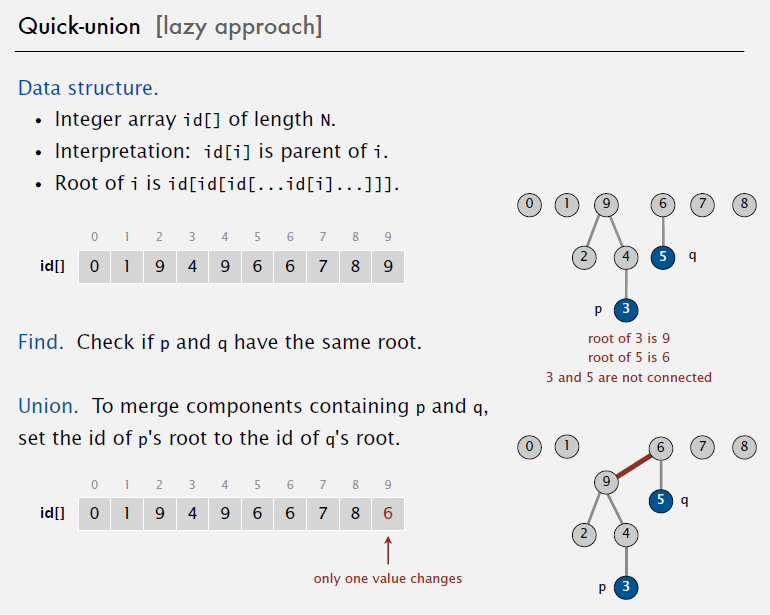

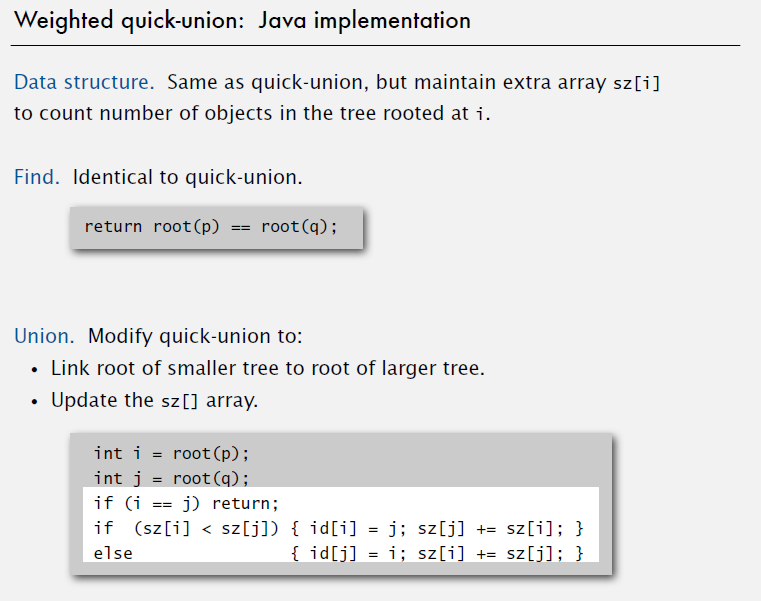

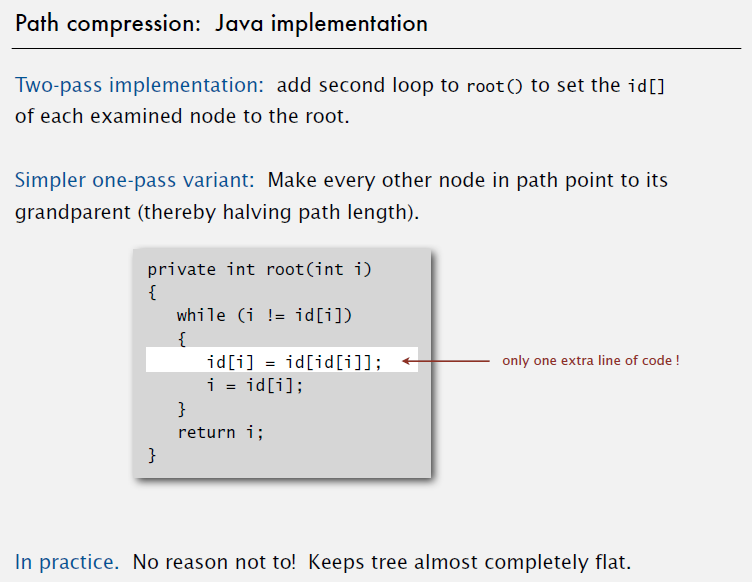

## Linked List

In [17]:
class Node:
    def __init__(self, item):
        self.item = item
        self.next = None
    def __repr__(self):
        return f'Node({self.item})'

class LinkedList:
    def __init__(self):
        self.first = None
    def is_empty(self):
        return self.first == None
    def push(self, item):
        oldfirst = self.first
        self.first = Node(item)
        self.first.next = oldfirst
    def pop(self):
        item = self.first.item
        first = self.first.next
        return item
    def reverse(self):
        """Reverses the list"""
        
    def is_cyclic(self):
        """Returns True if there's a cycle
        
        Based on Floyd's Cycle Finding Algorithm:
        Imagine two runners, one fast and one slow. If there's no cycle, the fast runner will eventually reach the end 
        of the list. But if there is a cycle, at some point the fast runner will pass the slow runner!
        """

## Stacks

* 'First in, first out' approach to storing items
* Can be implemented using a linked list or array

## Queues

* 'Last in, first out' approach to storing items
* Can also be implemented using a linked list or array

## Bags

* Don't care about order of items, just the collection
* Just like a stack without pop, or a queue without dequeue

## Priority Queue

* Add items as in normal queues
* Allows the removal of specific items (the max, the min, etc.)
* Useful for keeping track of the top X items in a large stream of items where keeping track of every item isn't possible

## Binary Heaps
* Efficient way to implement priority queue functionality
* Binary heaps are based on complete binary trees. A binary tree is a data structure where positions are either empty or nodes with links to the left and right. A complete binary tree is a binary tree that is perfectly balanced (except for the bottom level).
* A binary heap is therefore an array representation of a heap-ordered complete binary tree.
    * "Heap-ordered": keys are in nodes, parent's key no smaller than childrens' keys
    * "Array representation": indices start at 1, take nodes in level order, no explicit links needed
    * Largest key is at a[1], which is the root of the binary tree
    * Can use array indices to move through the tree. For example, the parent of node k is at position k/2. The children of a node are at 2k and 2k + 1.
    
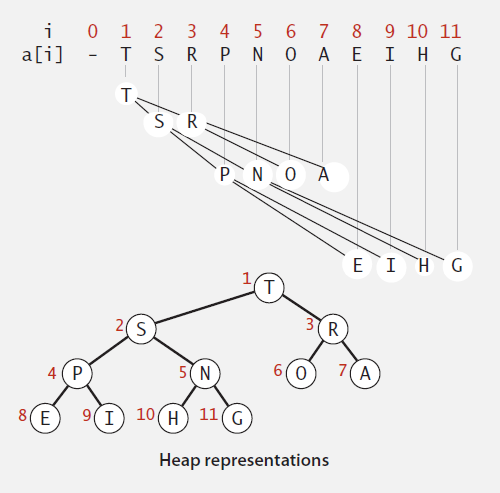

##### How to handle violations of heap order + applications
1. A child's key becomes larger than its parent's key
    * Exchange key in child with key in parent
    * Repeat until heap order is restored
    * Often called a "swim" operation
    * Can be used to insert a new element into a heap: insert the item at the next available position, then call swim operation to put the new element in its proper order
2. A parent's key becomes smaller than one of its children's
    * Exchange key in parent with key in larger child
    * Repeat until heap order is restored
    * Often called a "sink" operation
    * Can be used to delete the max in a heap: exchange the root (which is the max) with the last element in the heap, then call sink operation to put that element in its proper place, finally removing the last element in the heap (the former max)

In [4]:
class PQMax:
    """Implementation of a max-oriented priority queue using a binary heap"""
    def __init__(self, max_size=5):
        """
        Initialize priority queue with null in first position because binary
        heaps need to start at index 1
        """
        self.pq = [np.nan]
        self.current_size = 0
        self.max_size = max_size
        
    def is_empty(self):
        return len(self.pq) == 1
    
    def insert(self, item):
        self.pq.append(item)
        self.current_size += 1
        self._swim(self.current_size)
        if self.current_size > self.max_size:
            self._del_max()
    
    def is_heaped(self):
        for k in range(self.current_size, 1, -1):
            if self.pq[k] > self.pq[k // 2]:
                return False
        return True
    
    def _swim(self, k):
        while k > 0 and self.pq[k] > self.pq[k // 2]:
            self._swap(k, k // 2)
            k = k // 2
            
    def _sink(self, k):
        while 2 * k <= self.current_size:
            j = 2 * k
            if j < self.current_size and self.pq[j] < self.pq[j + 1]:
                j += 1
            if self.pq[k] > self.pq[j]:
                break
            self._swap(k, j)
            k = j
            
    def _swap(self, i, j):
        swap = self.pq[i]
        self.pq[i] = self.pq[j]
        self.pq[j] = swap
        
    def _del_max(self):
        self._swap(1, self.current_size)
        self.pq = self.pq[:-1]
        self.current_size -= 1
        self._sink(1)
        

In [5]:
for i in range(0, 10000):
    nums = [random.randint(0, 10) for i in range(0, 8)]
    pq = PQMax()
    for num in nums:
        pq.insert(num)
        if not pq.is_heaped():
            print(pq.pq, 'busted')

In [6]:
pq.pq

[nan, 6, 3, 6, 1, 3]

* Both insertions and deleting the max operations occur in log N time. Finding the max occurs in constant time. In this way, binary heap representations have advantages over ordered and unordered arrays.
* Can easily re-implement the code above to change to a minimum-oriented priority queue.

# Symbol Tables (aka Maps, Dictionaries)

* Data structure for storing key-value pairs

## Elementary Implementations

Just use the default, but here's how you could do it yourself:

1. Unordered linked list of key-value pairs
    * Downside is operations take linear time (need to scan possibly all keys in the table to search/insert--linear time)
2. Maintain ordered arrays of key-value pairs
    * Use two separate, parallel arrays for keys and values
    * Maintain order using sorting
    * Binary search can then be used to find the position of a value in the table (use that position for search and insert)
    * Problem is that an insertion and deletion might require changing the position of every other value in the table
    * Search = log N (binary search), insert = N

## Applications

* Useful for creating frequency counter (eg, given a list of words, count the frequency of each word)

# Binary Search Trees (BST)

* A binary search tree is a binary tree in symmetric order
    * A binary tree is a tree composed of nodes with left and right branches (that can be either another node or empty)
    * Symmetric order means that, for any node, all nodes to the left have a value less than the node, and all nodes to the right have a value greater than the node
* You can implement a symbol table with a BST
* If N distinct keys are inserted into a BST in <strong>random</strong> order, the expected number of compares for insert/search operations is ~2 log N
    * Note that this is the same as for quicksort partitioning
* But a problem arises when the keys are not inserted in a random order--the worst case number of compares for a BST is N. 
    * This occurs, for example, when keys are inserted in order. Finding the smallest element in that case requires N compares (the entire length of the BST)
    * The shape of a binary search tree will depend on the order in which keys are inserted!

In [226]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.count = 1
        
    def __repr__(self):
        return f"({self.key}, {self.value})"
        
        
class BST:
    def __init__(self):
        self.root = None
        
    def put(self, key, value):
        self.root = self._put(self.root, key, value)
    
    def _put(self, node, key, value):
        if not node:
            return Node(key, value)
        
        if key > node.key:
            node.right = self._put(node.right, key, value)
        elif key < node.key:
            node.left = self._put(node.left, key, value)
        elif key == node.key:
            node.value = value
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
    
    def get(self, key):
        if not self.root:
            return
        node = self.root
        while node:
            if key == node.key:
                return node
            elif key > node.key:
                node = node.right
            elif key < node.key:
                node = node.left
        return
    
    def contains(self, key):
        if self.get(key) is not None:
            return True
        return False
    
    def get_max(self, node):
        while node.right:
            node = node.right
        return node
    
    def get_min(self, node):
        while node.left:
            node = node.left
        return node
    
    def size(self):
        """Returns the size of the entire tree."""
        return self._size(self.root)
    
    def _size(self, node):
        """Returns the number of nodes in the subtree rooted at a node."""
        if not node:
            return 0
        else:
            return node.count
        
    def rank(self, key):
        return self._rank(key, self.root)
        
    def _rank(self, key, node):
        """Returns the number of keys less than key k."""
        if not node:
            return 0
        if key == node.key:
            return self._size(node.left)
        elif key < node.key:
            return self._rank(key, node.left)
        elif key > node.key:
            return 1 + self._size(node.left) + self._rank(key, node.right)
        
    def range_count(self, lo, hi):
        """Gets a count of keys between lo and hi."""
        if self.contains(hi):
            return self.rank(hi) - self.rank(lo) + 1
        else:
            return self.rank(hi) - self.rank(lo)
        
    def range_search(self, lo, hi):
        """Returns all keys between lo and hi."""
        return self._range_search(self.root, lo, hi)
        
    def _range_search(self, node, lo, hi):
        nodes = []
        if node.key > lo and node.key < hi:
            nodes.extend([node])
        if node.key > lo and node.left:
            nodes.extend(self._range_search(node.left, lo, hi))
        if node.key < hi and node.right:
            nodes.extend(self._range_search(node.right, lo, hi))
        return nodes
    
    def delete_min(self):
        self.root = self._delete_min(self.root)
        return
    
    def _delete_min(self, node):
        if not node.left:
            return node.right
        node.left = self._delete_min(node.left)
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
    
    def delete(self, key):
        self.root = self._delete(self.root, key)
        return
    
    def _delete(self, node, key):
        if not node:
            return
        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.right:
                return node.left
            elif not node.left:
                return node.right
            else:
                temp = node
                node = self.get_min(temp.right)
                node.right = self._delete_min(temp.right)
                node.left = temp.left
                
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
        

In [227]:
t = BST()
t.put(0, 10)
t.put(1, 2)
t.put(4, 5)
t.put(3, 2)
t.put(10, 0)

#### Deletion in BSTs: Hibbard Deletion

Efficient deletion in a BST is still something of an open question. The established method, called Hibbard Deletion, ultimately results in a less-balanced tree over many insertions and deletions, leading to degraded performance.

Nevertheless, here's how Hibbard Deletion works:

To delete a node with key k:
1. Find the node
2. If the node has no children, set the link to the node to be null
3. If the node has only one child, set the parent link equal to the child node
4. If the node has two children, replace the node with its successor (the minimum in the right subtree), then delete the minimum (ie, the original node to delete)

# Balanced Search Trees (2-3 Trees, Red-Black Trees)

Since basic BSTs suffer from the problem of being unbalanced depending on the order of insertion, other data structures were developed to compensate.

## 2-3 Search Trees

The idea behind 2-3 search trees is to allow <strong>1 or 2 keys per node</strong>
    * If a node has 1 key, it will have 2 children
    * If a node has 2 keys, is will have 3 children
This results in the tree being balanced, where every path from the root to a null link has the same length

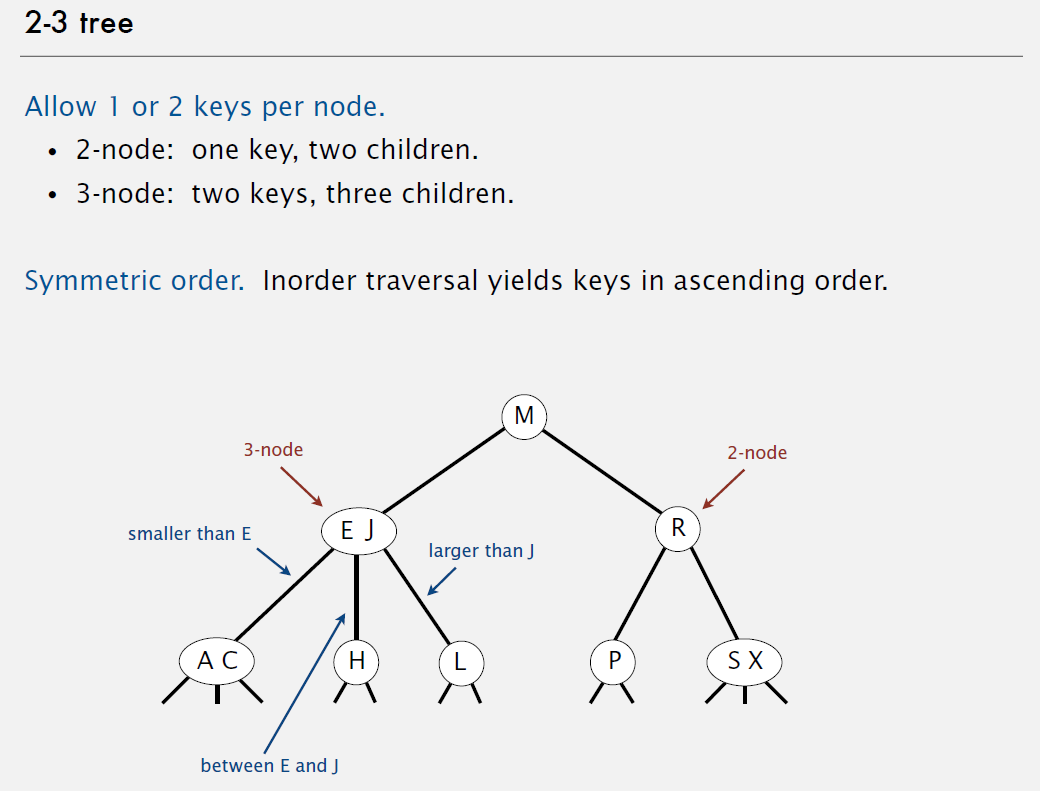



* Searching in a 2-3 tree is guaranteed to take time proportional to log N because the tree is perfectly balanced.
* Inserting a new node into a 2-3 tree is somewhat complicated:
    * If the node to insert into is a 2-node, simply add the new key to create a 3-node
    * But if the node to insert into is already a 3-node, add the key to create a temporary 4-node. Then, move the middle key into the parent node, repeating that process up the tree until you have a legal 2-3 tree (no 4-nodes). If you end up with a 4-node at the root, split the root into 3 2-nodes, and the new root will be the middle key. This is the only time the height of a 2-3 tree increases
    
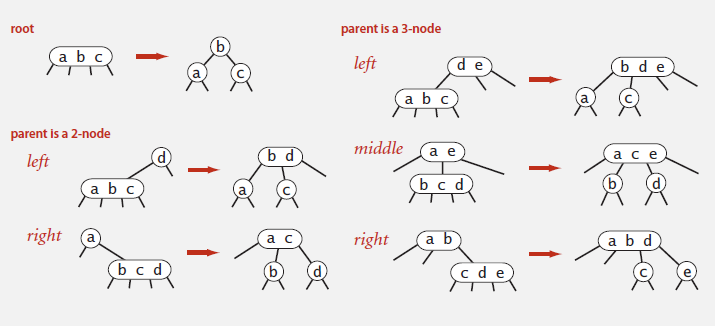

Actually implementing a 2-3 is too complicated, and red-black BSTs do this much more easily anyway (according to the class)

## Left-leaning Red-Black BSTs

* Red-Black binary search trees allow for easy implementation of the 2-3 tree concept
* The idea is to represent 2-3 trees as BSTs, replacing 3-nodes with BSTs of size 2, with the link between the keys in the former 3-node represented by 'red links'

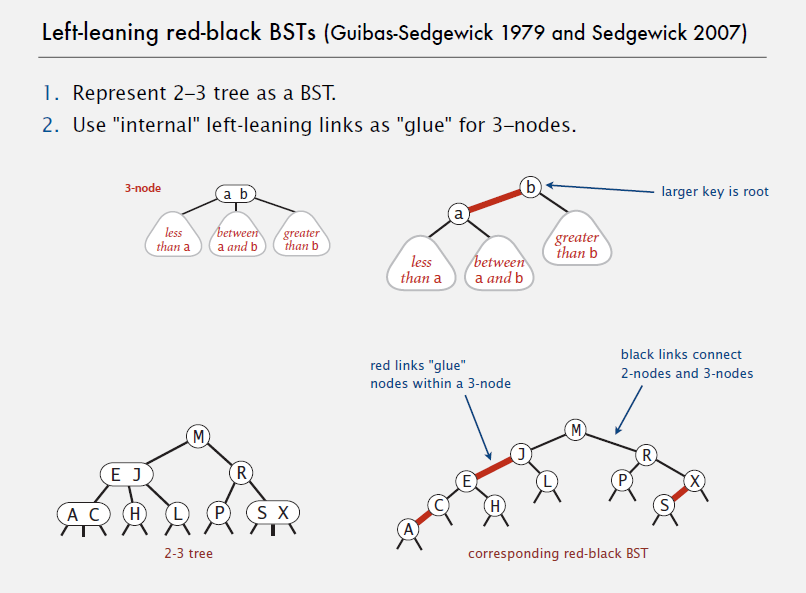

* Properties:
    * No node has 2 red links connected
    * Every path from the root to null link has the same number of black links (perfect black balance)
    * All red links lean left
* Therefore, operations on red-black trees can be understood in the same way as the operation on 2-3 trees
    * In fact, much of the code is the same as for normal BSTs and the color of the links is ignored, BUT the operations benefit from the fact that the tree is balanced

#### Insertion into a Red-Black Tree

* Basic strategy is to maintain a 1-1 correspondence with a 2-3 tree by applying red-black operations
* Note that all nodes will initially be inserted with the color set to RED

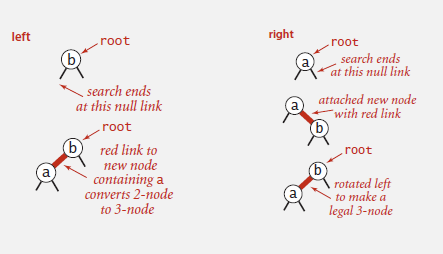

* 3 basic cases can be handled by a single block of code:
    * If the right child is red and the left child is black, rotate left
    * If the left child and the left-left grandchild is red, rotate right
    * If both children are red, flip the colors
    
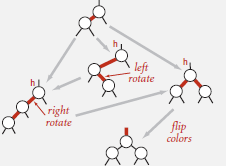

### So why care about red-black BSTs?

* Just an example of a balanced binary search tree implementation. There are others, but this one is pretty straightforward
* Having a BST be balanced turns out to be really important for reducing the worst-case scenario runtime for insertion into a BST: when keys are inserted in ascending or near-ascending order, runtime approachs <strong>quadratic</strong> time because the tree turns into a single giant line. Balancing the BST avoids this issue. (See below example)
* Red-black BSTs guarantee that the height of a BST will be <strong>at most</strong> 2*ln N (and thus insertions will remain time efficient)

In [137]:
class RBNode:
    def __init__(self, key, value):
        """This is the same code as for normal BST nodes, except that there's
        a new attribute 'is_red' to note whether the incoming link to the node
        is a red node or a black node. 
        
        This is much easier than maintaining a separate link type implemenation,
        and it works because each node in the tree can be referenced by the link
        to its parent in the tree."""
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.is_red = True #Black is false, red is true
        
    def __repr__(self):
        return f"({self.key}, {self.value}) [{'red' if self.is_red else 'black'}]"    
        
    def rotate_left(self):
        """Used when an insertion results in a red link pointing to the right."""
        assert self.right.is_red
        x = self.right
        self.right = x.left
        x.left = self
        x.is_red = self.is_red
        self.is_red = True
        return x
    
    def rotate_right(self):
        """Sometimes also need to temporarily orient a left-leaning link
        to lean right."""
        assert self.left.is_red
        x = self.left
        self.left = x.right
        x.right = self
        x.is_red = self.is_red
        self.is_red = True
        return x
        
    def flip_colors(self):
        """Used when a 4-node would be created. No need to move any nodes,
        just need to change the colors to indicate splitting of the 4-node."""
#         assert not self.is_red
        assert self.left.is_red
        assert self.right.is_red
        self.is_red = True
        self.left.is_red = False
        self.right.is_red = False
        
        
class RBBST:
    def __init__(self):
        self.root = None
    
    def put(self, key, value):
        self.root = self._put(node=self.root, key=key, value=value)
    
    def _put(self, node, key, value):
        if not node:
            return RBNode(key, value)
            
        if key == node.key:
            node.value = value
        elif key > node.key:
            node.right = self._put(node=node.right, key=key, value=value)
        elif key < node.key:
            node.left = self._put(node=node.left, key=key, value=value)
                
        if not getattr(node.left, 'is_red', False) and getattr(node.right, 'is_red', False):
            node = node.rotate_left()
        elif getattr(node.left, 'is_red', False) and getattr(node.left.left, 'is_red', False):
            node = node.rotate_right()
        elif getattr(node.left, 'is_red', False) and getattr(node.right, 'is_red', False):
            node.flip_colors()
        return node
            
    def get(self, key):
        """Gets value associated with a key, if it exists"""
        if not self.root:
            return
        node = self.root
        while node:
            if key == node.key:
                return node.value
            elif key > node.key:
                node = node.right
            elif key < node.key:
                node = node.left
        return 

In [153]:
nodes = {random.randint(0, 1000): random.randint(0, 10) for i in range(0, 1000)}
nodes_sorted = {i: random.randint(0, 10) for i in range(0, 1000)}

In [145]:
s = time.time()
rb = RBBST()
for key, val in nodes.items():
    rb.put(key, val)
print(f'RBBST {time.time() - s}s')

s = time.time()
rb = BST()
for key, val in nodes.items():
    rb.put(key, val)
print(f'BST {time.time() - s}s')

RBBST 0.0069713592529296875s
BST 0.0029921531677246094s


In [157]:
s = time.time()
rb = RBBST()
for key, val in nodes_sorted.items():
    rb.put(key, val)
print(f'RBBST {time.time() - s}s')

s = time.time()
rb = BST()
for key, val in nodes_sorted.items():
    rb.put(key, val)
print(f'BST {time.time() - s}s')

RBBST 0.009973764419555664s
BST 0.21043896675109863s


## B-Trees

Generalization of a 2-3 tree that allows up to M - 1 key-link pairs per node (typically M is very large, several 1000s). This structure results is very shallow balanced trees.

The idea is that all keys are available in external nodes (keys in internal nodes are copied down).

B-trees are used in file systems to limit the number of probes required to find a particular file.

Even for extremely large numbers of keys, the total number of probes required to find any 1 is around 4. This is because searching for a single key requires between log(M-1)N and log(M/2)N, where M is the number of keys allowed in a node, and N is the number of keys.

B-trees are also used in the implementations of many database systems.

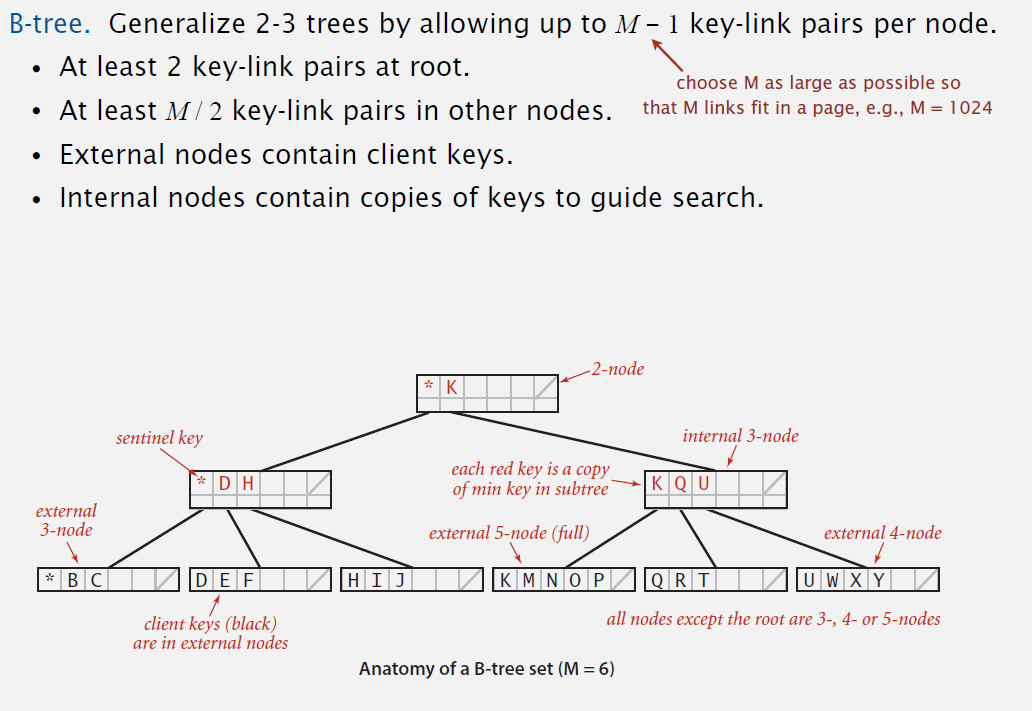

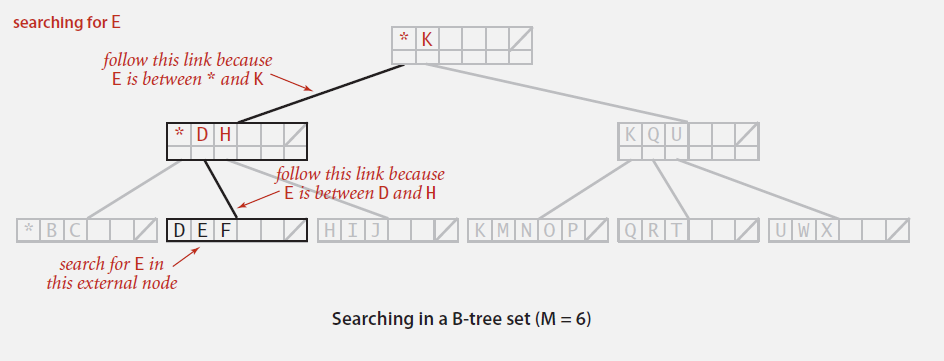

## k-d Trees

k-d trees are an extension of binary search trees that allow efficient processing of sets of points in space (enabling 2-dimensional applications)

Geometric interpretation: Key are points in a plane. Want to be able to find and count points contained within a given rectangle.

Problem: how do we organise geometric space to efficiently find a given point?
* One solution is to just divide the plane into M grids of equal size, then search the relevant grid for a given point. But that solution ignores the clustering problem, where points won't be evenly distributed throughout the grids.
* A better solution is to divide the plane using <strong>space-partitioning trees</strong>, which can adapt to clustered data.

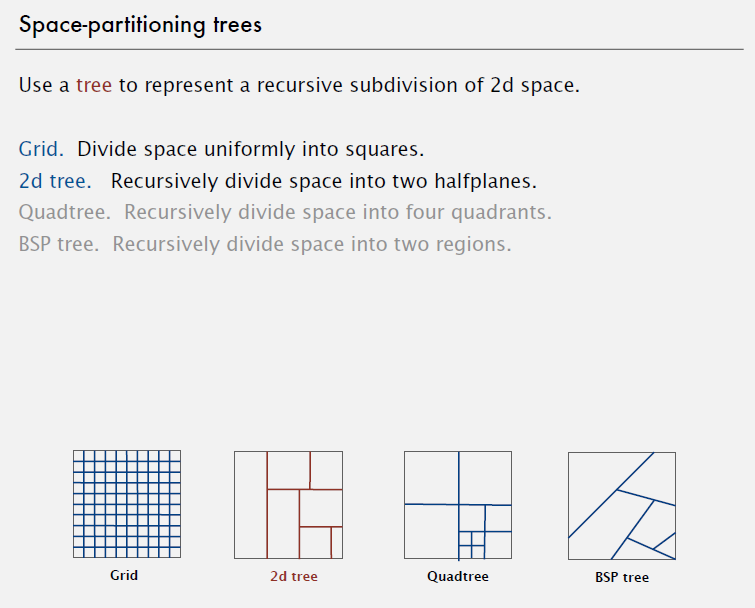

### 2d tree

* Recursively partition plan into two halfplanes
* How does this work? Use alternating x and y coordinates of incoming points to sub-divide the plane.
* The data structure is a binary search tree, where the keys alternate between the x and y coordinates depending on the level in the tree:

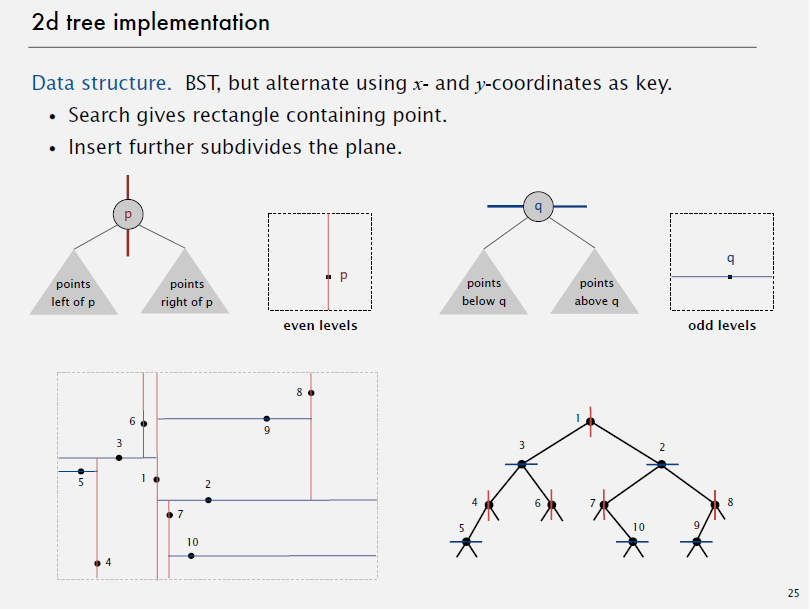

* The code is otherwise exactly the same as a standard BST

#### Range search in a 2d tree

* Can leverage the structure of the 2d tree to efficiently search for the points contained within a given rectangle
* Typical case is log N, worst case is sqrt(N)

#### Nearest neighbor search

* Can also leverage 2d trees to solve the nearest neighbor problem: find the closest point to a given query point
* Typical case is log N, worse case is N (if the tree is balanced)

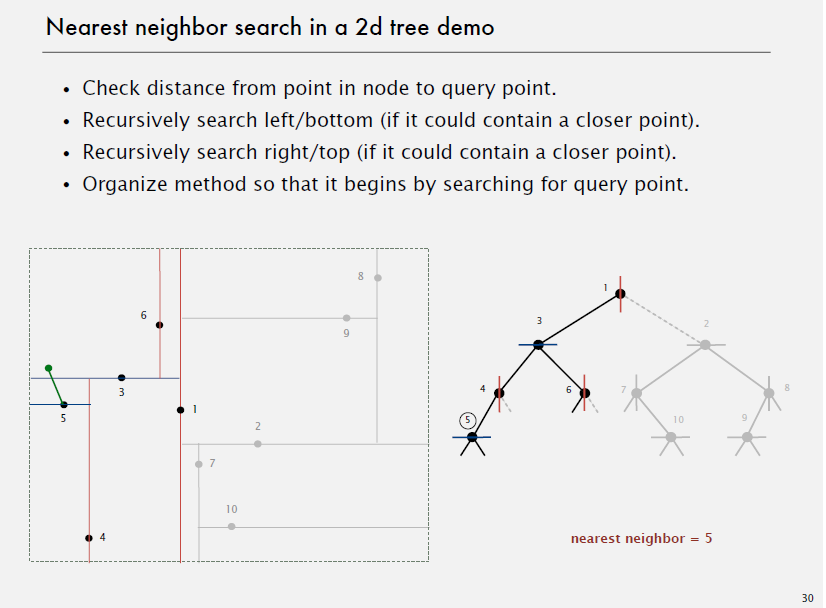

## A k-d Tree is just a generalization of 2d trees!

* Using the same idea as a 2d tree, a k-d tree enables efficient partitioning of data in k-dimensions
* As in the 2d tree, cycle through all relevant dimensions through the different levels of the tree
* Enables 3d range searching, but also higher-dimensional searching as well (data tends to cluster, especially at higher dimensions)

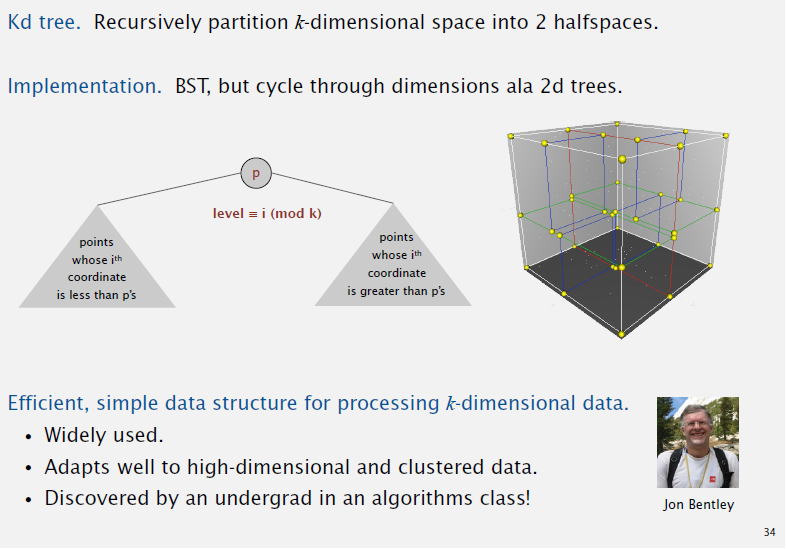

## 1d Interval Search

* Data structure to hold set of intervals, which may overlap - Interval Search Tree
* Implementation: Create a binary search tree, where each node stores an <strong>interval</strong>, where the left endpoint of the interval is the key, and the node also contains the max endpoint of the subtree rooted at the node

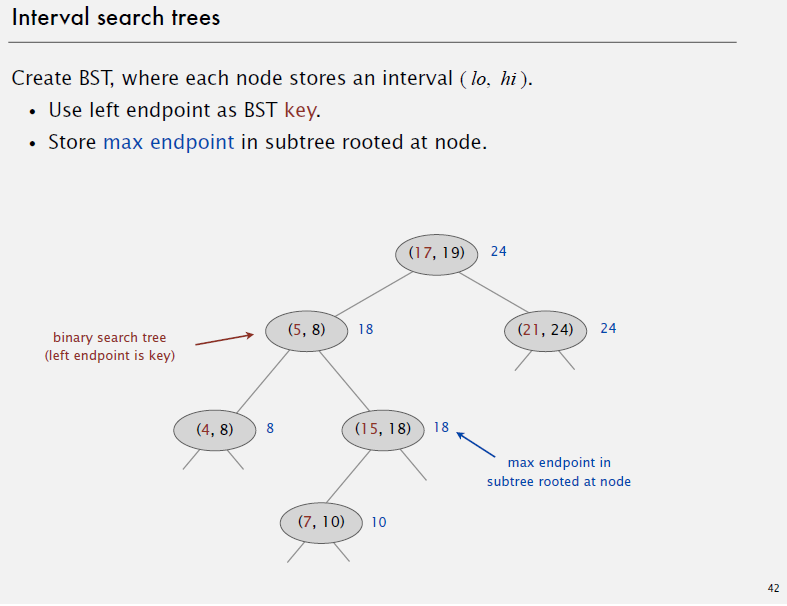

#### Operations

1. Insert: insertion is the same as for a normal BST, you just use the left endpoint of the interval as the comparison key. Only other trick is to update each node on the insertion path to check if there's a new max right endpoint in the subtree
2. Intersection: to check for an intersection with a given interval i(lo, hi):
    * Starting at the root, check if the interval at the current node intersects with the given interval
    * Else if the left subtree is empty, go right
    * Else if the max endpoint in the left subtree is less than the left endpoint of the given interval, go right
    * Else go left
    
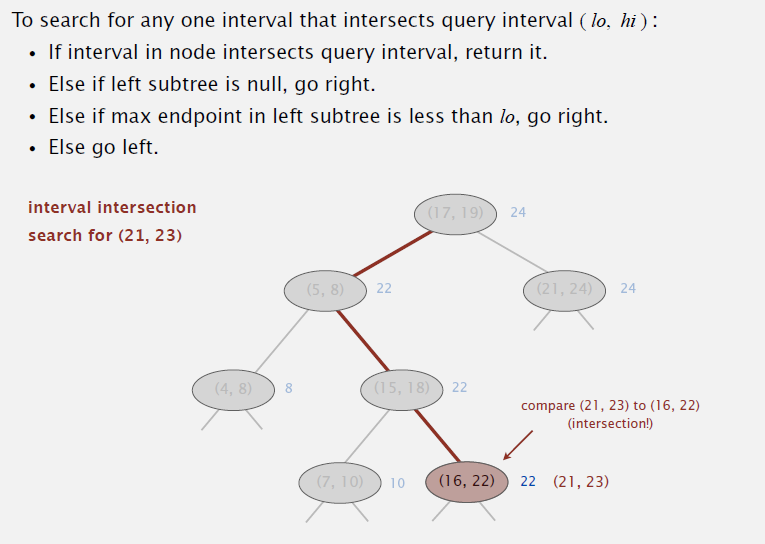

* Checking for any single intersection is easy because you know that if there's no intersecting interval in the left subtree of a node, there's guaranteed to be no intersection in the right subtree of that node
* Use a red-black BST as the underlying data structure to guarantee performance, adding the right endpoint and max endpoints to the nodes

# Hash Tables

* So red-black BSTs are the most efficient symbol table implementation so far, guaranteeting logarithmic performance for all operations.
* But by using hashing, many operations can be reduced to constant time!
    * The trade-off is that ordering is lost.
* The basic idea is to store key-value pairs in arrays so you can access keys (and values) using array indexing.
* Reducing keys to integers and thus array indices is done via <strong>hashing</strong>

## Hash functions

* Goal: scramble the keys uniformly to produce a table index
* Practical challenge: need a different approach for different types of keys
* Hash functions:
    * Required that if x == y, then hash(x) == hash(y)
    * Desireable, but not always achievable: if !(x == y), then hash(x) != hash(y)
* Uniform hashing assumption: each key is equally likely to hash to an integer between 0 and M - 1, where M is the size of the hash table

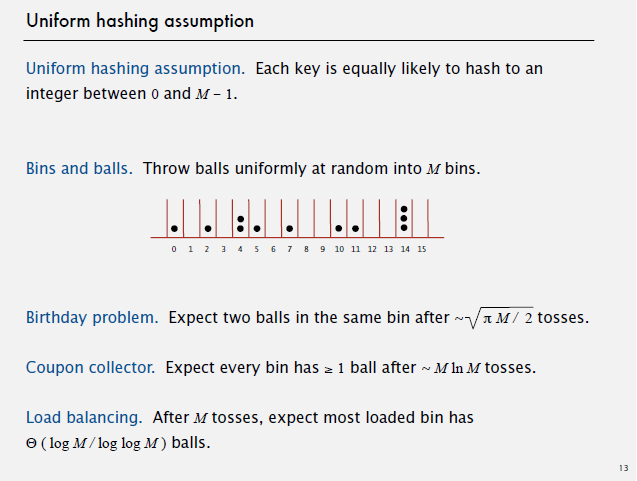

## Collisions

* A collision happens when two keys hash to the same index
    * The 'birthday problem' says that you can't avoid collisions unless you use a huge amount of memory
    * Meanwhile, the 'coupon collector problem' combined with load balancing say that collisions will be roughly evenly distributed.
* So how to efficiently deal with collisions?
    1. <strong> Separate chaining symbol table:</strong> Use an array of M < N linked lists. Keep a linked list at each hash value, insert keys at the start of each linked list. This way, you only have to search the linked list at the hash position to find the relevant key.
        * Analysis: number of probes for search/insert is proportional to N / M. Typical choice is M ~ N/5, which leads to constant-time operations, on average.
    2. <strong>Linear probing:</strong> When a new key collides, find the next empty slot in the key array and put the key there. To search, hash the key and look at the hashed index. If the space is occupied but not a match, try i+1, i+2, etc., until either the key or an empty position is hit.
        * Essential that the array size must be greater than the number of key-value pairs (ideally, should be half empty at all times)
        * So long as the table is reasonably empty, search, insert, and delete operations take constant time (at half full, search ~3/2, insert/delete ~5/2)

## Other considerations

* Sometimes, the cost of computing the hash function for a given key is so high that using a red-black binary search tree might even be faster than using a hash table.
* There are cases when the uniform hashing assumption breaks down or the risk of a failure of the assumption is too high. In those cases, using a BST implementation instead removes that concern.
    * Pacemakers, nuclear reactors, etc.
    * DDOS attacks can exploit specific hash functions of particular systems by sending many keys that hash to the same value in order to crash a system
* One-way hash functions (like SHA-2) that make it very difficult to exploit the hash function do exist (and are used in security contexts), but they're too computationally expensive to use in a typical symbol table implementation.

## Hash tables vs Balanced search trees:

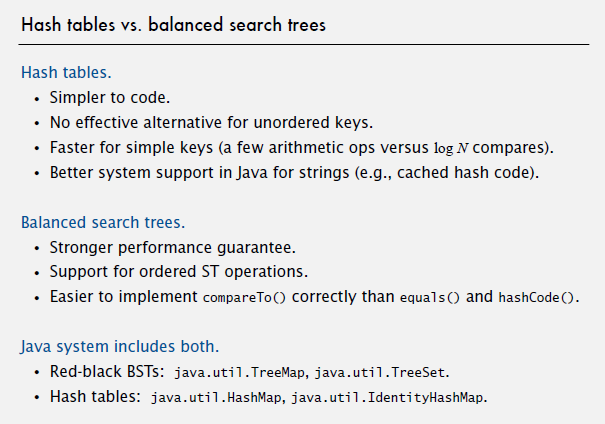

## Symbol table applications

### Sets

* A set is just a collection of distinct keys
* Can be implemented using any of the symbol table implementations above by simply removing all references to values of keys
* <strong>Exception Filters:</strong> Sets can be used to create an 'exception filter' to apply against a given dataset
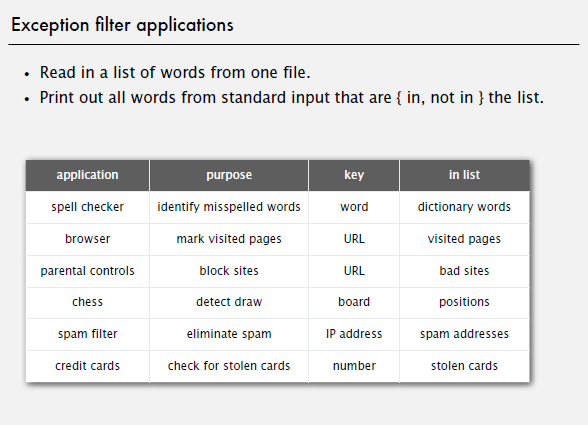

## Dictionaries

* Dictionaries are another common application of symbol tables, which allows for efficient storage and retrieval of key-value pairs

## Indexing

* Create an index so that, given a search key, you can efficiently find all objects indicated by that key
* Example: file system indexing that allows for searching the contents of files for a given query string
    * Build the index from a list of files (ex, all files on a computer), where, for each word in each file, add that word as a key in the symbol table (if it doens't already exist) and associate the file name with that key
* Example: Concordance queries: given a word, find all occurrences in a text along with the immediate context

## Sparse Vectors

* It's more efficient to represent an array with many 0 or null entries with a symbol table containing only positions in the array with values.
    * Use a symbol table where the array index is the key, and the value is the value
* Important application for sparse vectors common in mathematical applications like matrix multiplication
    * Massive improvement in running time

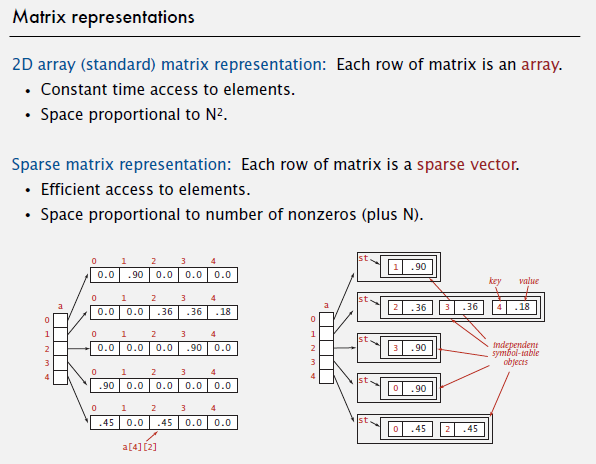

# Undirected Graphs

* A graph is a set of vertices connected pairwise by edges
* Definitions:
    * <strong>Path</strong>: a sequence of vertices connected by edges
    * <strong>Cycle</strong>: path whose first and last vertices are the same
    * <strong>Degree</strong>: the number of edges connected to a vertex
* Two vertices are connected if there is a path between them
* Graph processing problems:
    * Is there a path between s and t?
    * What's the shortest path between s and t?
    * Is there a cycle in the graph?
    * Is there a way to connect all vertices?
    
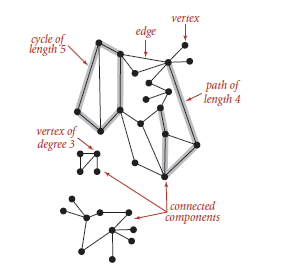

* One of the biggest challenges in graph processing is simply to determine whether a problem is easy or hard
* Graph processing algorithms are generally based on iterating over vertices adjacent to v

#### Representing Graphs

* Graphs can often be drawn in multiple ways
* Vertex representation: Use integers between 0 and V - 1 to represent vertices in the graph (allows access to values using symbol table)
* Keep information about the graph stored in an <strong>adjacency-list</strong>, a vertex-indexed array of lists

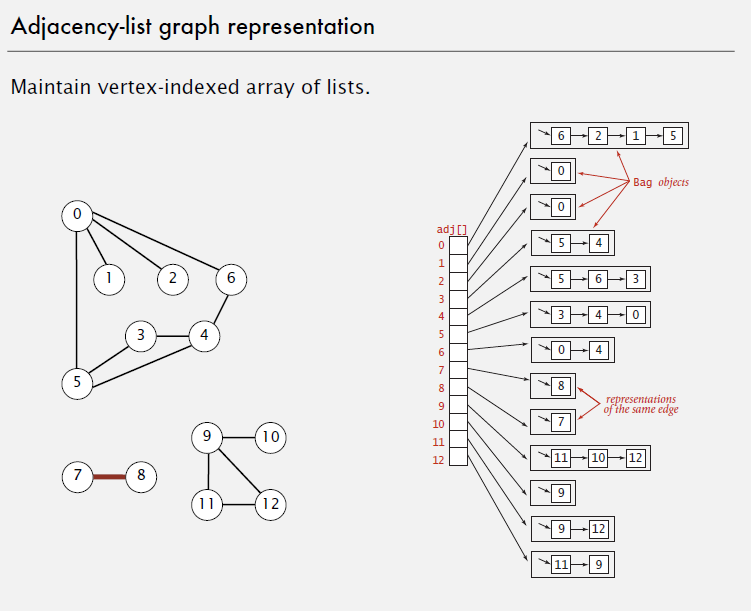

In [34]:
class Graph:
    def __init__(self, V):
        """Init graph with V vertices and adjacency list adj.
        
        The adjacency list will be represented by a dictionary where the keys
        are the vertices and the values are the vertices connected to a given
        vertex.
        
        The implementation in the Java course uses bags for this, but it isn't
        clear to me what the advantage of doing so in Python would be.
        """
        self.V = V
        self.E = 0 # Number of edges
        self.adj = {v: [] for v in range(0, V)}
        
    def __repr__(self):
        graph_str = ''
        for v in self.adj.keys():
            for w in self.adj[v]:
                graph_str += f'{v} - {w}\n'
        return graph_str.strip()
        
    def add_edge(self, v, w):
        """Adds an edge between v and w.
        
        Parallel (duplicate) edges and self-loops are allowed!
        """
        self.adj[v].append(w)
        self.adj[w].append(v)
        self.E += 1
        return

In [46]:
def shuffle(l):
    for i in range(0, len(l)):
        j = random.randint(0, i)
        swap = l[i]
        l[i] = l[j]
        l[j] = swap
    return l

edges = [[0, 1],[0, 2],[0, 5],[0, 6],[3, 4],[3, 5],[4, 5],[4, 6],
         [7, 8],[9, 10],[9, 11],[9, 12],[11, 12]]

edges = shuffle(edges)
g = Graph(13)
for edge in edges:
    g.add_edge(edge[0], edge[1])

In [47]:
print(g)

0 - 6
0 - 5
0 - 1
0 - 2
1 - 0
2 - 0
3 - 5
3 - 4
4 - 6
4 - 5
4 - 3
5 - 3
5 - 0
5 - 4
6 - 4
6 - 0
7 - 8
8 - 7
9 - 11
9 - 10
9 - 12
10 - 9
11 - 12
11 - 9
12 - 11
12 - 9


In [41]:
edges

[[9, 11],
 [3, 5],
 [11, 12],
 [0, 2],
 [3, 4],
 [0, 5],
 [9, 12],
 [4, 6],
 [0, 6],
 [4, 5],
 [7, 8],
 [0, 1],
 [9, 10]]